In [5]:
from mediapipe import solutions #el tespiti iin görsel işleme görevlerini
from mediapipe.framework.formats import landmark_pb2 # "landmark_pb2" formati cinsinden verileri almak için
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [6]:
MARGIN = 10 #metnin üst köşesinden elin sınırına olan mesafe
FONT_SIZE = 1 # yazı tipi boyutu
FONT_THICKNESS = 1 #yazı kalınlığı
HANDEDNESS_TEXT_COLOR = (88,205,54) # RGB formatında yeşil renk

In [7]:
base_options = python.BaseOptions(model_asset_path="hand_landmarker.task")
options = vision.HandLandmarkerOptions(base_options=base_options,num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

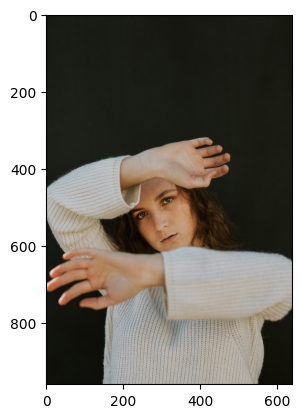

In [8]:
img = cv.imread("data/el_ornek_1-230621-130021.jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img,cmap="gray")

In [9]:
img.shape

(960, 640, 3)

In [10]:
image = mp.Image.create_from_file("data/el_ornek_1-230621-130021.jpg")
detection_result = detector.detect(image)

In [11]:
image

In [12]:
detection_result

HandLandmarkerResult(handedness=[[Category(index=1, score=0.9357715249061584, display_name='Right', category_name='Right')], [Category(index=0, score=0.9608952403068542, display_name='Left', category_name='Left')]], hand_landmarks=[[NormalizedLandmark(x=0.39291912317276, y=0.7066095471382141, z=-3.293027077688748e-07, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.34312063455581665, y=0.7504479885101318, z=-0.019821790978312492, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.2708950638771057, y=0.7737331986427307, z=-0.027366425842046738, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.20807738602161407, y=0.779670238494873, z=-0.03694787248969078, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.15704940259456635, y=0.7829774022102356, z=-0.04580849036574364, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.2020859718322754, y=0.7279683947563171, z=0.004851780831813812, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.13295286893844604, y=0.743130087

In [24]:
def draw_landmarks_on_image(rgb_image,detection_result):
    hand_landmarks_list = detection_result.hand_landmarks # tespit edilen elin işaretlendirmelerini içerir.
    handedness_list = detection_result.handedness # tepit edilen eli sağ ve sol olma durumu
    annotated_image = np.copy(rgb_image) # girdi görüntüsü kopyalanır.

    # tespit edilen elleri işaretlemeek için bir döngü oluşturulur.
    for idx in range(len(hand_landmarks_list)):
        hand_landmarks = hand_landmarks_list[idx] # indeksi kullanarak el işaretlemelerini alır
        handedness = handedness_list[idx] # indeksi kullanarak hangi elin tespit edildiği

        hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList() #landmark_pb2 formatında bir liste oluşturur.
        hand_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(x=landmark.x,y=landmark.y,z=landmark.z) for landmark in hand_landmarks])
        solutions.drawing_utils.draw_landmarks(
            annotated_image,
            hand_landmarks_proto,
            solutions.hands.HAND_CONNECTIONS,
            solutions.drawing_styles.get_default_hand_landmarks_style(),
            solutions.drawing_styles.get_default_hand_connections_style())
        
        height,width,_ = annotated_image.shape
        x_coordinates = [landmark.x for landmark in hand_landmarks]
        y_coordinates = [landmark.y for landmark in hand_landmarks]
        test_x = int(min(x_coordinates)*width)
        test_y = int(min(y_coordinates)*height)-MARGIN

        cv.putText(annotated_image,f"{handedness[0].category_name}",(test_x,test_y),cv.FONT_HERSHEY_DUPLEX,
                   FONT_SIZE,HANDEDNESS_TEXT_COLOR,FONT_THICKNESS,cv.LINE_AA)
        
        return annotated_image

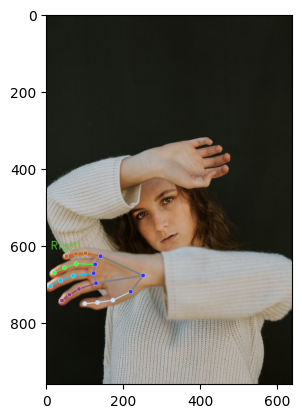

In [26]:
annotated_image = draw_landmarks_on_image(image.numpy_view(),detection_result)
plt.figure()
plt.imshow(annotated_image)

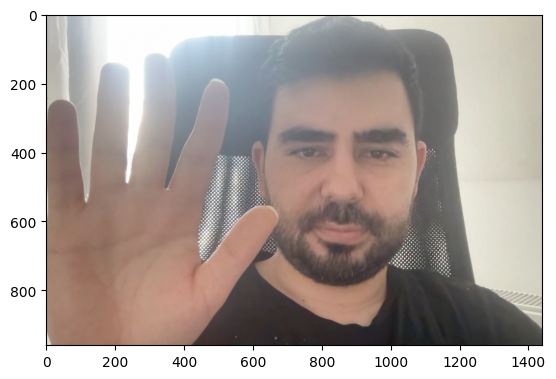

In [27]:
img = cv.imread("data/el_ornek_2-230621-130029.jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)

In [29]:
image = mp.Image.create_from_file("data/el_ornek_2-230621-130029.jpg")

detection_result = detector.detect(image)
detection_result

HandLandmarkerResult(handedness=[[Category(index=0, score=0.9869698882102966, display_name='Left', category_name='Left')]], hand_landmarks=[[NormalizedLandmark(x=0.13932213187217712, y=0.999625563621521, z=6.62074057800055e-07, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.24264460802078247, y=0.9528952836990356, z=-0.05306704342365265, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.3279273509979248, y=0.8380020260810852, z=-0.07162006199359894, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.3831513226032257, y=0.7179696559906006, z=-0.08617129921913147, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4401511549949646, y=0.6285657286643982, z=-0.10138418525457382, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.2658219039440155, y=0.6010321378707886, z=-0.04122306406497955, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.30657508969306946, y=0.4348279535770416, z=-0.07212378084659576, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.32989615

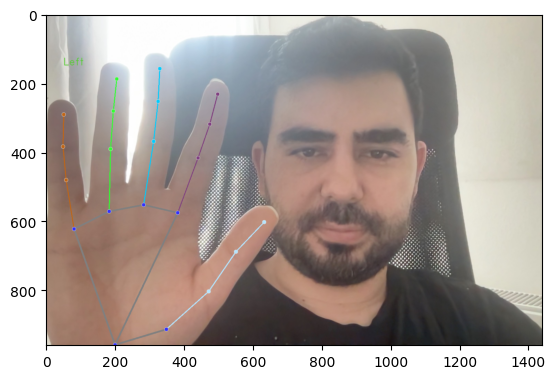

In [30]:
annotated_image = draw_landmarks_on_image(image.numpy_view(),detection_result)
plt.figure()
plt.imshow(annotated_image)